https://www.kaggle.com/code/shriharijhawar13/cnn-model-for-sign-language-mnist-dataset#CNN-Model-creation

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.layers as tfl

In [2]:
training_data = pd.read_csv('sign_mnist_train.csv')
test_data = pd.read_csv('sign_mnist_test.csv')

In [3]:
print(training_data.shape)
print(test_data.shape)

(27455, 785)
(7172, 785)


In [4]:
print(np.sum(training_data.isna().sum()))
print(np.sum(test_data.isna().sum()))

0
0


In [50]:
X_train = training_data.drop(labels = ["label"],axis = 1) 
Y_train = training_data["label"]

In [6]:
X_test = test_data.drop(labels = ["label"],axis = 1)
Y_test = test_data["label"]

In [7]:
# X_train = X_train / 255.0

# X_test = X_test / 255.0

In [8]:
display(X_train.shape)
display(X_test.shape)
display(Y_train.shape)
display(Y_test.shape)

(27455, 784)

(7172, 784)

(27455,)

(7172,)

<AxesSubplot:xlabel='label', ylabel='Count'>

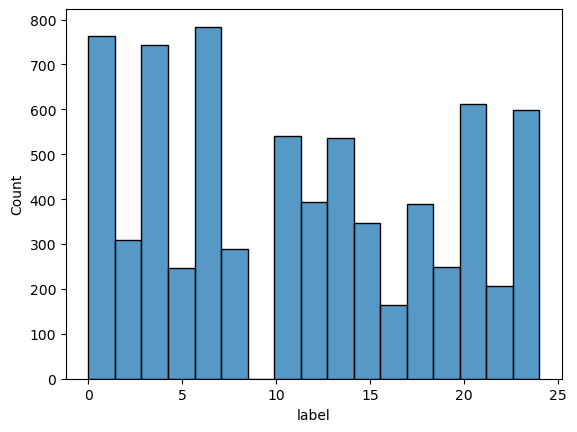

In [9]:
sns.histplot(x=Y_test, data = Y_test)

<AxesSubplot:xlabel='label', ylabel='Count'>

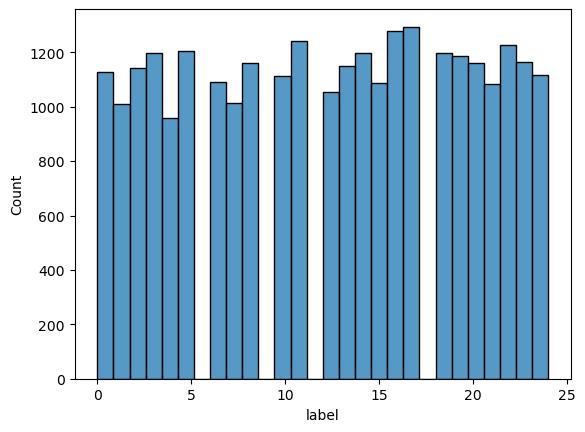

In [10]:
sns.histplot(x=Y_train, data = Y_train)

In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

reg = model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


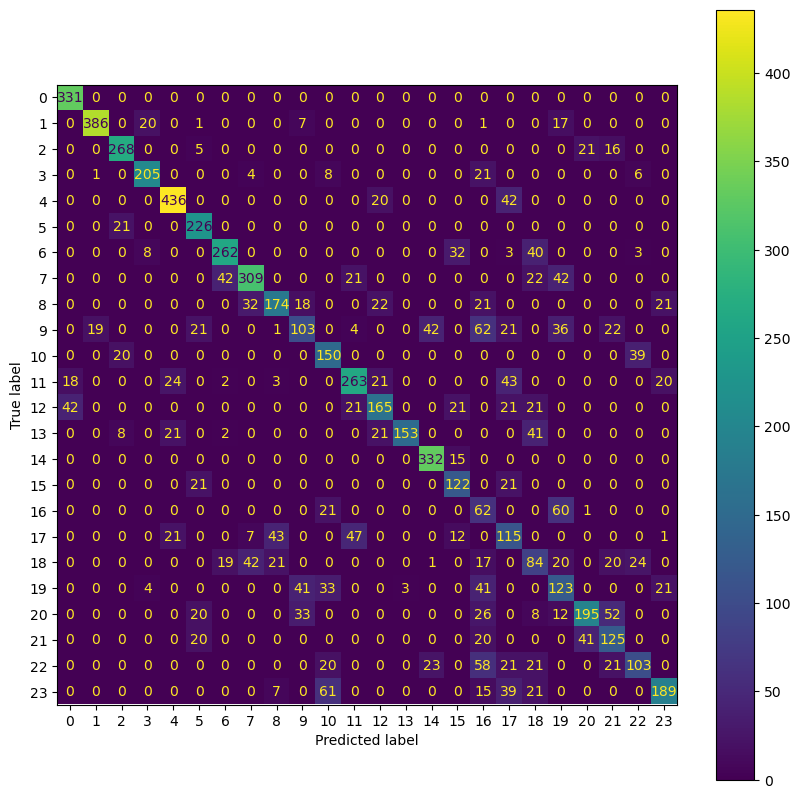

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)

In [13]:
# from sklearn.metrics import precision_score,f1_score

# precision = precision_score(Y_test,Y_pred)
# f1_score = f1_score(Y_test,Y_pred)
# tp,fp,fn,tn=cm.ravel()
# sensibilite = tp/(tp+fn)
# specificite = tn/(tn+fp)

In [130]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, Y_pred,output_dict=True)

classification_report_raw_LR = pd.DataFrame.from_dict(report)
score_classification_report_raw_LR=classification_report_raw_LR['macro avg']

In [51]:
from sklearn.preprocessing import StandardScaler

# creating a standard scaler
sc = StandardScaler()

# fitting independent data to the model
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

D:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

reg = model.fit(X_train,Y_train)


Y_pred = model.predict(X_test)

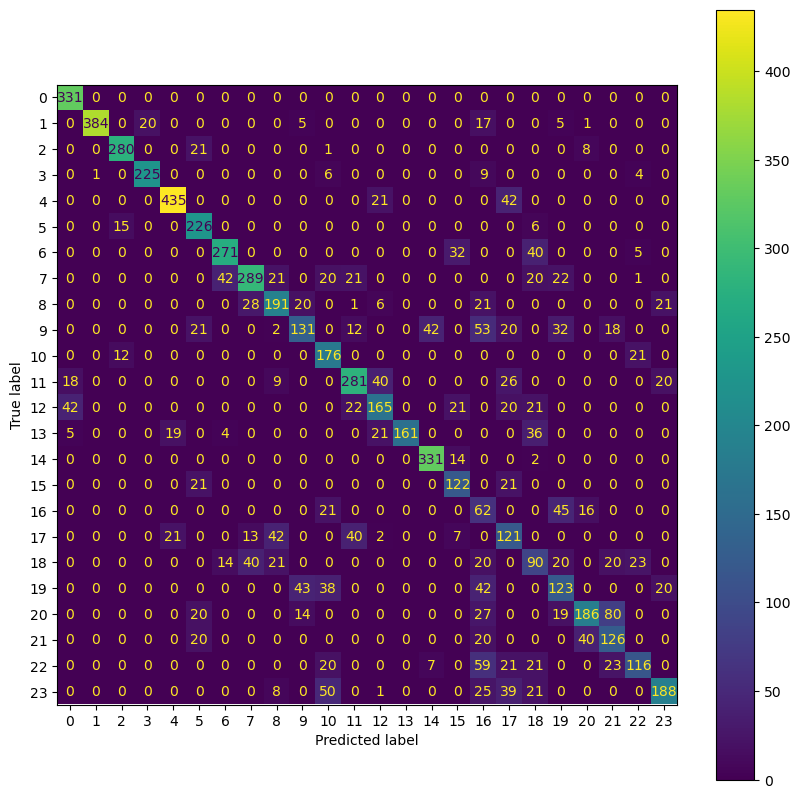

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)

In [128]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, Y_pred,output_dict=True)

classification_report_normalize_LR = pd.DataFrame.from_dict(report)
score_classification_report_normalize_LR=classification_report_normalize_LR['macro avg']

**Normaliser permet d'avoir de meilleurs scores et de converger**

**Utiliser Gaussian NB**

In [20]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

reg = model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

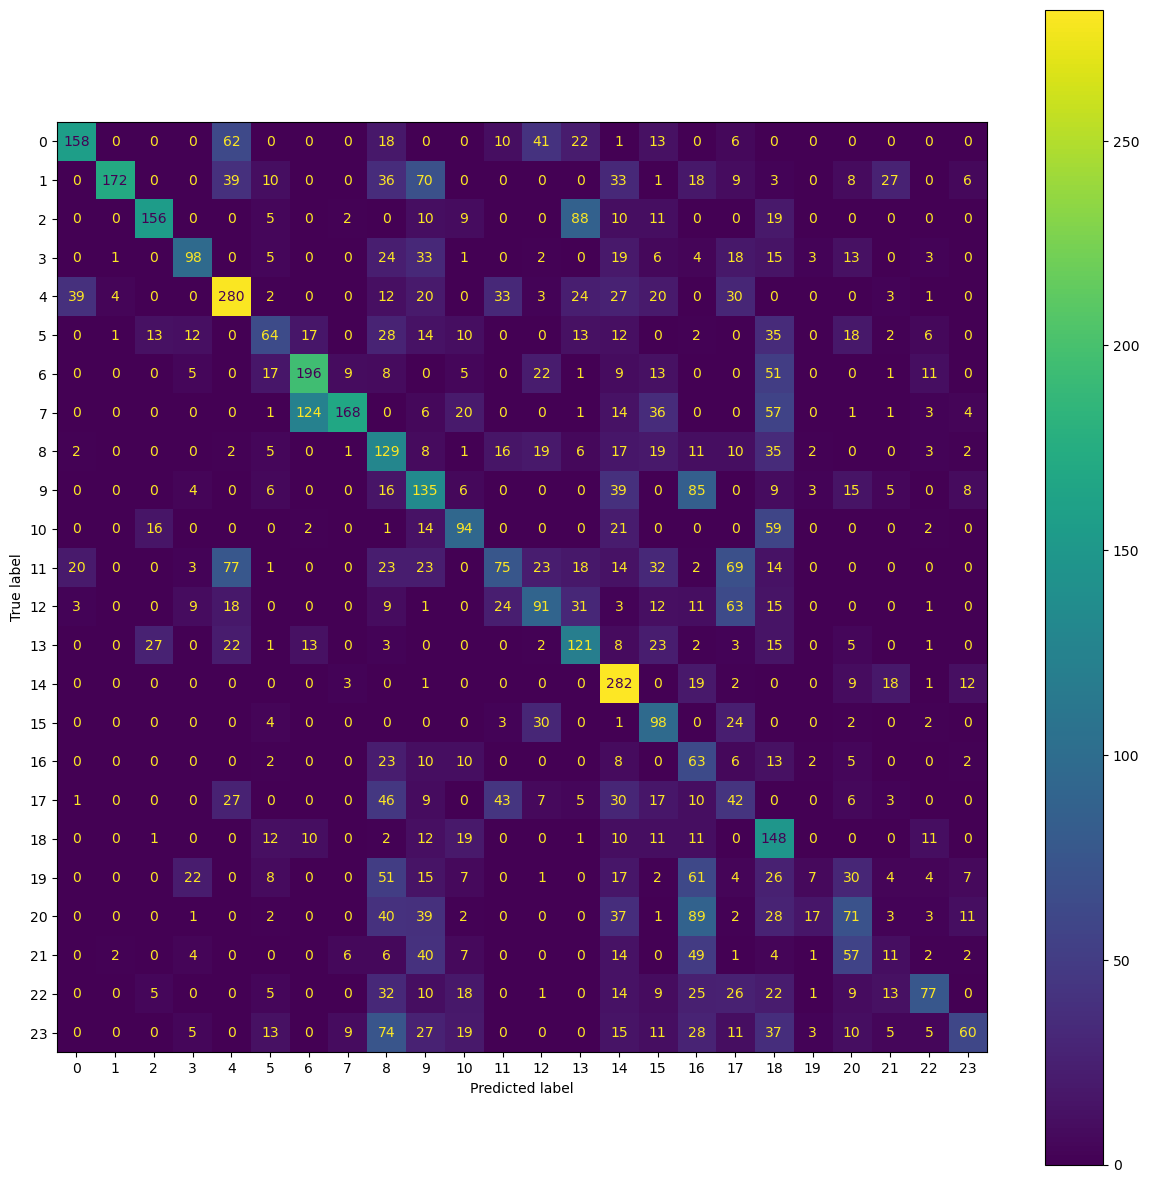

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)

# changer la taille de la figure en utilisant la méthode set_size_inches
fig.set_size_inches(15, 15)

In [125]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, Y_pred,output_dict=True)

classification_report_NB = pd.DataFrame.from_dict(report)
score_classification_report_NB=classification_report_NB['macro avg']

**Utiliser le decision tree**

In [24]:
from sklearn.tree import DecisionTreeClassifier

# créer un modèle d'arbres de décision
model = DecisionTreeClassifier()

# entraîner le modèle en utilisant les données d'entraînement
model.fit(X_train, Y_train)

# prédire des labels pour les données de test
Y_pred = model.predict(X_test)

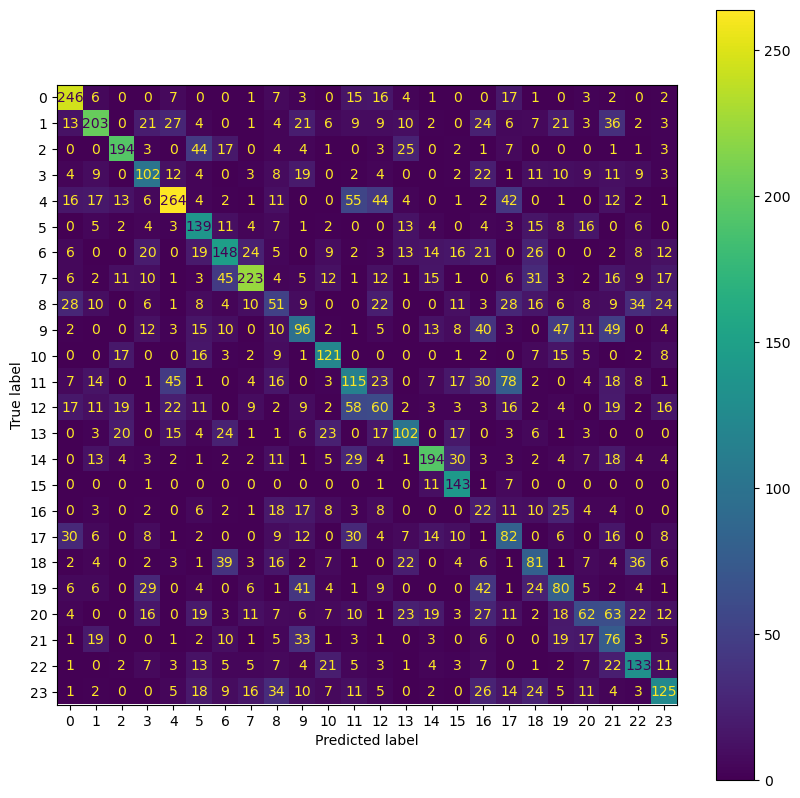

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)

In [124]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, Y_pred,output_dict=True)

classification_report_DTC = pd.DataFrame.from_dict(report)
score_classification_report_DTC=classification_report_DTC['macro avg']

**Random Forrest Classfiier**

In [35]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

reg = model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

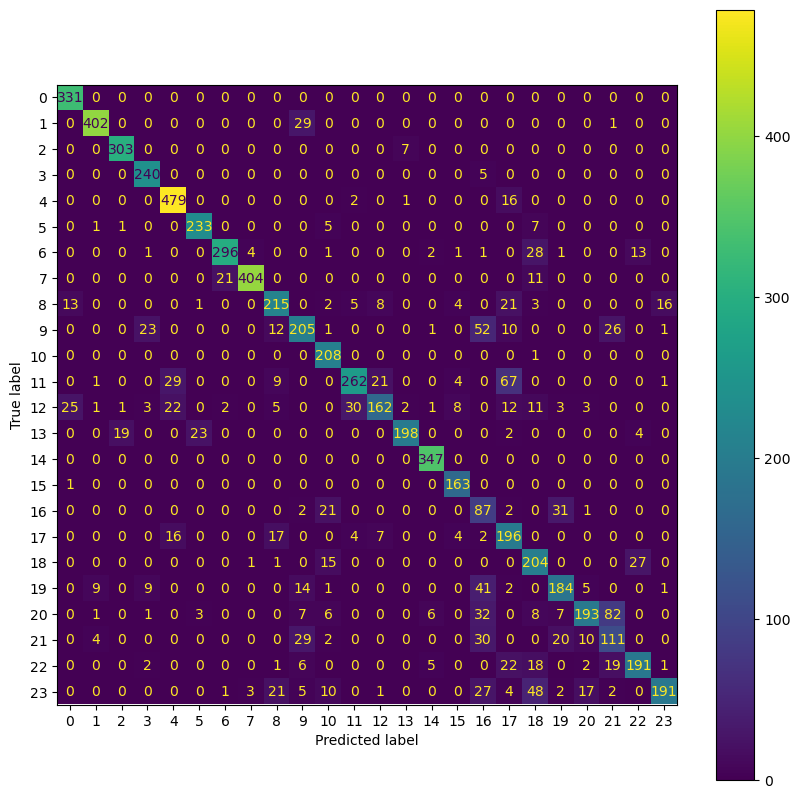

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)

In [122]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, Y_pred,output_dict=True)

classification_report_RFC = pd.DataFrame.from_dict(report)
classification_report_RFC
score_classification_report_RFC=classification_report_RFC['macro avg']

In [38]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()

reg = model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

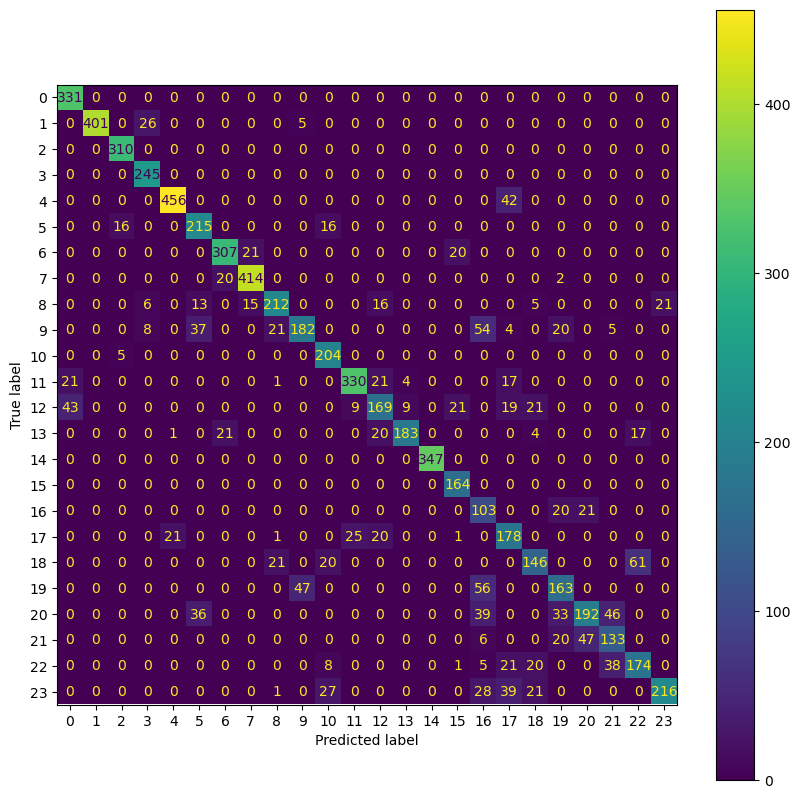

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)

In [121]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, Y_pred,output_dict=True)

classification_report_MLPC = pd.DataFrame.from_dict(report)
classification_report_MLPC
score_classification_report_MLPC=classification_report_MLPC['macro avg']

In [41]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier

# Normaliser les données d'entrée
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Définir le classificateur de réseau de neurones avec plusieurs couches cachées et fonctions d'activation différentes
model = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu')

# Entraîner le modèle
reg = model.fit(X_train_scaled, Y_train)

# Prédire les résultats sur les données de test
Y_pred = model.predict(X_test_scaled)

# Utiliser la méthode de bagging pour combiner plusieurs classificateurs de réseau de neurones
bagging = BaggingClassifier(base_estimator=model, n_estimators=10)
reg = bagging.fit(X_train_scaled, Y_train)

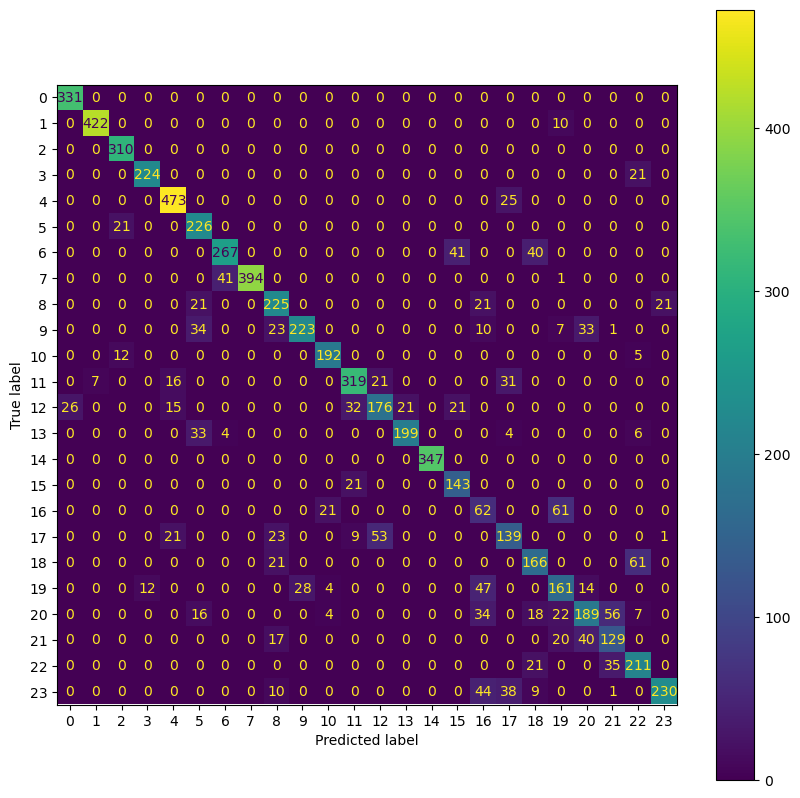

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)

In [43]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, Y_pred,output_dict=True)

classification_report_BMLPC = pd.DataFrame.from_dict(report)
classification_report_BMLPC
score_classification_report_BMLPC=classification_report_BMLPC['macro avg']

,0,1,2,3,4,5,6,7,8,10,...,18,19,20,21,22,23,24,accuracy,macro avg,weighted avg
precision,0.927171,0.983683,0.903790,0.949153,0.900952,0.684848,0.855769,1.000000,0.705329,0.888446,...,0.586498,0.653543,0.570922,0.684783,0.581081,0.678457,0.912698,0.802844,0.781820,0.813390
recall,1.000000,0.976852,1.000000,0.914286,0.949799,0.914980,0.767241,0.903670,0.781250,0.673716,...,0.565041,0.669355,0.605263,0.546243,0.626214,0.790262,0.692771,0.802844,0.784229,0.802844
f1-score,0.962209,0.980256,0.949464,0.931393,0.924731,0.783362,0.809091,0.949398,0.741351,0.766323,...,0.575569,0.661355,0.587591,0.607717,0.602804,0.730104,0.787671,0.802844,0.778707,0.804214
support,331.000000,432.000000,310.000000,245.000000,498.000000,247.000000,348.000000,436.000000,288.000000,331.000000,...,246.000000,248.000000,266.000000,346.000000,206.000000,267.000000,332.000000,0.802844,7172.000000,7172.000000


**On cherche de meilleurs paramètres**

In [44]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Normaliser les données d'entrée
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Définir les hyperparamètres à tester
parameters = {'hidden_layer_sizes': [(100, 100), (200, 200)],
              'activation': ['relu', 'tanh'],
              'alpha': [0.0001, 0.001]}

# Utiliser la recherche en grille pour sélectionner les meilleurs hyperparamètres
clf = GridSearchCV(MLPClassifier(), parameters, cv=5)
clf.fit(X_train_scaled, Y_train)

# Imprimer les meilleurs hyperparamètres trouvés
print(clf.best_params_)

{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100)}


In [45]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier

# Normaliser les données d'entrée
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Définir le classificateur de réseau de neurones avec plusieurs couches cachées et fonctions d'activation différentes
model = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu',alpha=0.0001)

# Entraîner le modèle
reg = model.fit(X_train_scaled, Y_train)

# Prédire les résultats sur les données de test
Y_pred = model.predict(X_test_scaled)

# Utiliser la méthode de bagging pour combiner plusieurs classificateurs de réseau de neurones
bagging = BaggingClassifier(base_estimator=model, n_estimators=10)
reg = bagging.fit(X_train_scaled, Y_train)

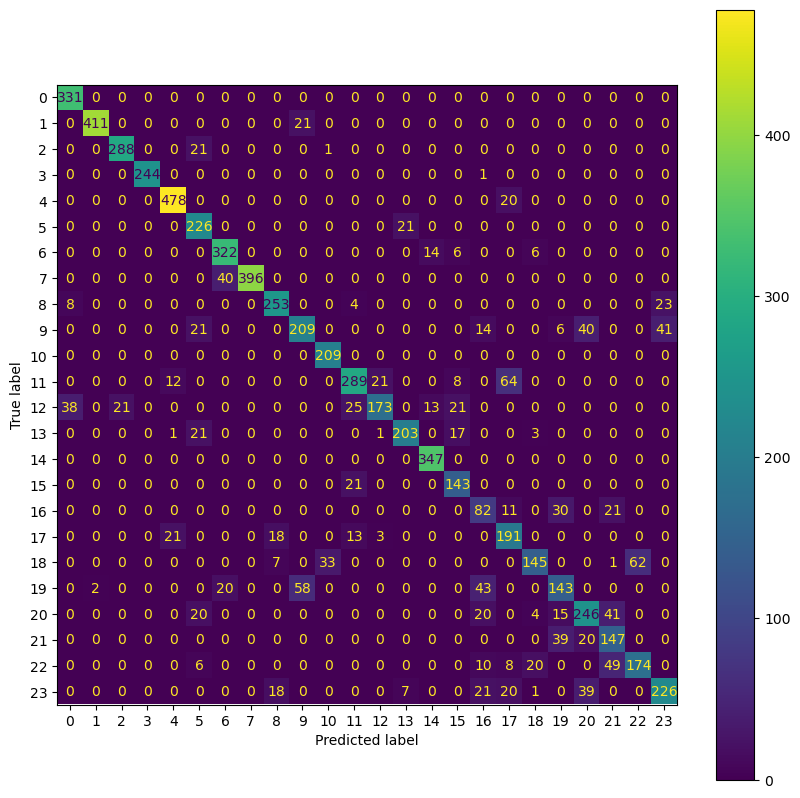

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)

In [120]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, Y_pred,output_dict=True)

classification_report_BMLPC2 = pd.DataFrame.from_dict(report)
classification_report_BMLPC2
score_classification_report_BMLPC2=classification_report_BMLPC2['macro avg']

**Pas vraiment de meilleurs résultats**

In [81]:
# In this step we are dividing the dataset in to X and Y training values
# X contains information about the images 
# Y contains the correspondind label of that image
# These two values will be used to train the model
#creating our X for the training data
x_train = training_data.drop(labels = ["label"],axis = 1) 
#creating our Y for the training data
y_train = training_data["label"]

# In this step we are dividing the dataset in to X and Y test values
# X contains information about the images
# Y contains the correspondind label of that image
# These two values will be used to test the model
#creating our X for the training data
x_test = test_data.drop(labels = ["label"],axis = 1) 
#creating our Y for the training data
y_test = test_data["label"]

In [82]:
x_train = x_train / 255.0

x_test = x_test / 255.0

In [83]:
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)
print(x_train.shape)
print(x_test.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [84]:
model = keras.Sequential([
    
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(5,5), activation="relu", padding='same',
                  input_shape=[28, 28, 1]),
    layers.MaxPool2D(),
    layers.Dropout(.25),
    
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(.25),
    
    layers.BatchNormalization(),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(.25),

    layers.BatchNormalization(),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(.25),
    
    layers.Flatten(),
    layers.Dropout(.25),
    layers.Dense(units=64, activation="relu"),
    layers.Dense(units=26, activation="softmax"),
])

In [85]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [86]:
epochs = 13
batch_size = 128
model_history = model.fit(x = x_train, y = y_train, epochs = epochs, batch_size = batch_size)

Epoch 1/13
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
215/215 [==============================] - 12s 48ms/step - loss: 3.0804 - accuracy: 0.1123
Epoch 2/13
215/215 [==============================] - 11s 49ms/step - loss: 1.8564 - accuracy: 0.3974
Epoch 3/13
215/215 [==============================] - 13s 61ms/step - loss: 0.9689 - accuracy: 0.6620
Epoch 4/

In [99]:
pred = model.predict(x_test)

225/225 [==============================] - 1s 4ms/step


In [107]:
display(y_train.shape)
display(y_test.shape)
display(pred.shape)

(27455,)

(7172,)

(7172, 26)

In [103]:
# Convertir les probabilités de classe en prédictions de classe
y_pred = np.argmax(pred, axis=1)

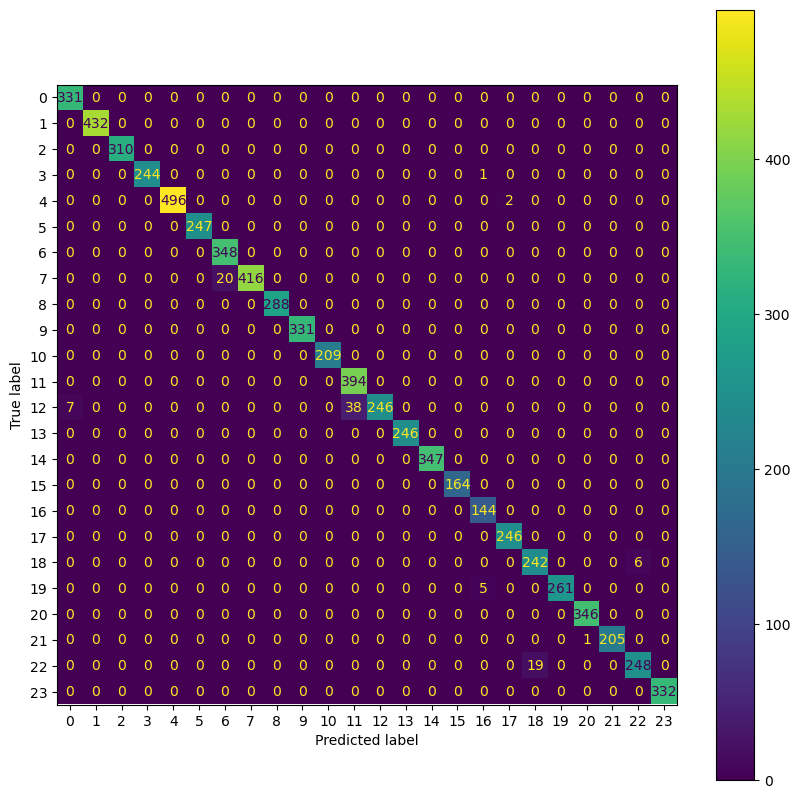

In [102]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)

In [119]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred,output_dict=True)

classification_report_CNN = pd.DataFrame.from_dict(report)
classification_report_CNN
score_classification_report_CNN=classification_report_CNN['macro avg']

In [131]:
# Obtenir un dictionnaire contenant toutes les variables globales
global_vars = globals()

# Filtrer les variables ayant un nom commençant par classification_report_
classification_report_vars = [v for k, v in global_vars.items() if k.startswith('score_classification_')]

# Imprimer les variables
for var in classification_report_vars:
    print(var)


precision       0.987067
recall          0.986349
f1-score        0.986223
support      7172.000000
Name: macro avg, dtype: float64
precision       0.801373
recall          0.806036
f1-score        0.798635
support      7172.000000
Name: macro avg, dtype: float64
precision       0.801373
recall          0.806036
f1-score        0.798635
support      7172.000000
Name: macro avg, dtype: float64
precision       0.801373
recall          0.806036
f1-score        0.798635
support      7172.000000
Name: macro avg, dtype: float64
precision       0.801373
recall          0.806036
f1-score        0.798635
support      7172.000000
Name: macro avg, dtype: float64
precision       0.801373
recall          0.806036
f1-score        0.798635
support      7172.000000
Name: macro avg, dtype: float64
precision       0.801373
recall          0.806036
f1-score        0.798635
support      7172.000000
Name: macro avg, dtype: float64
precision       0.801373
recall          0.806036
f1-score        0.798635
s